<h1> Sentiment analysis on twitter tweets </h1>

In [44]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [3]:
#nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\usman\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [5]:
print('Number of positivie tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))
print(f'\n The type of all positive tweets is : {type(all_positive_tweets)}')
print(f'The type of all negative tweets is : {type(all_negative_tweets)}')

Number of positivie tweets:  5000
Number of negative tweets:  5000

 The type of all positive tweets is : <class 'list'>
The type of all negative tweets is : <class 'list'>


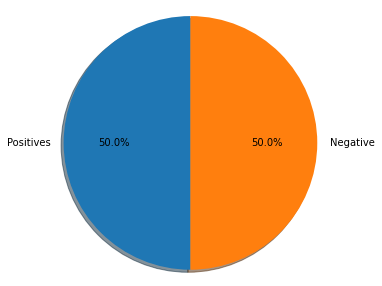

In [7]:
#Declare a figure with a custom size
fig = plt.figure(figsize=(5,5))
#labels for the two classes
labels = 'Positives', 'Negative'

#Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]
#Declare a  pie chart where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', 
       shadow= True,startangle=90)

#Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
#Display the chart
plt.show()

In [10]:
#print positive in green 
print(f'\033[92m {all_positive_tweets[random.randint(0,5000)]}')
#print negative in red 
print(f'\033[91m {all_negative_tweets[random.randint(0,5000)]}')

 @John_BHarris @FakeGhostPirate @F1StatMan @xownage133 It was a heritage sword made of wood, so no :D
 Please keep him in your prayers. He's very fragile. I can't even cry, I feel like I've done too much of that this week already. :(


<h1>PreProcess raw text for Sentiment Analysis </h1>
<p> Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:
    </p>
    <ul>
    <li>Tokenizing the string</li>
    <li>Lowercasing</li>
    <li>Removing stop words and punctuation</li>
    <li>Stemming</li>
    </ul>


In [11]:
#Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import re 
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [15]:
#Remove hyperlinks, Twitter marks and styles
print(f'\033[92m {tweet}')
print(f'\033[94m] ')
#remove old style retweet text 'RT'
tweet2 = re.sub(r'^RT[\s]+','',tweet)

#remove hyperlinks
tweet2 = re.sub(r'#','',tweet2)
print(tweet2)

 My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
] 
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… https://t.co/3tfYom0N1i


In [19]:
#Tokenize the string
print()
print(f'\033[92m {tweet2}')
print('\033[94m')

#Instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True,reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenize String:')
print(tweet_tokens)


 My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… https://t.co/3tfYom0N1i


Tokenize String:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…', 'https://t.co/3tfYom0N1i']


In [20]:
#remove stop words and punctuations
stopwords_english = stopwords.words('english')
print('Stop words \n')
print(stopwords_english)

print('\n Punctuation\n')
print(string.punctuation)

Stop words 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [21]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')
tweets_clean = []
for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)
print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…', 'https://t.co/3tfYom0N1i']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…', 'https://t.co/3tfYom0N1i']


<p>Stemming
Stemming is the process of converting a word to its general form, or stem. This helps in reducing the size of our vocabulary.</p>
#Consider the words:
<ul>
<li>learn</li>
<li>learning</li>
<li>learned</li>
<li> learnt</li>
</ul>


In [23]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer = PorterStemmer()

tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)
    
print('stemmed words: ')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…', 'https://t.co/3tfYom0N1i']

stemmed words: 
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…', 'https://t.co/3tfyom0n1i']


<h1> Building and Visualizing word frequencies </h1>


<p>helper functions </p>
<ul>
<li>process_tweet: 
    Cleans the text,tokenizes it into seperate words, removes stopwords, and converts words to stems
    </li>
    <li> build_freqs:
        This counts how often a word in the corpus (the entire set of tweets was associated with a positive label 1 or negative label 0. It then build the freqs dictionary, where eachkey is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.)
        </li>
</ul>


In [32]:
import re 
import string
import numpy as np 
from nltk.tokenize import TweetTokenizer

def process_tweet(tweet):
    '''
    Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    '''
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    #remove stock market tickers like $GE
    tweet = re.sub(r'\w$\w*','',tweet)
    #remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+','',tweet)
    #remove hashtags
    tweet = re.sub(r'https?:\/\/.*[\r\n]*','',tweet)
    #remove hashtags
    #only remaining the hash # sign from a word
    tweet = re.sub(r'#','',tweet)
    #tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles = True,reduce_len= True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and
              word not in string.punctuation):
        #tweets_clean.append(word)
            stem_word = stemmer.stem(word) #stemming word 
            tweets_clean.append(stem_word)
    return tweets_clean


In [37]:
def build_freqs(tweets,ys):
    """
        Build frequencies.
        Input: 
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)
        Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    
    #Convert np array to list since zip needs an iterable
    #The squeeze is necassary or the list ends up with one element.
    #Also note that this is just a NOP if ys is already a list
    
    yslist = np.squeeze(ys).tolist()
    
    #Start with an empty dictionary and populate it by looping over all tweets
    #and over all processed words in each tweet.
    
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] +=1
            else:
                freqs[pair] = 1
    return freqs

In [38]:
#make a numpy array representing labels of the tweets.
tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets))),np.zeros((len(all_negative_tweets))))
freqs = build_freqs(tweets, labels)

#check data type
print(f'type(freqs) = {type(freqs)}')

#check length of the dictionary
print('f len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
f len(freqs) = {len(freqs)}


In [39]:
print(freqs)

{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3568, ('hey', 1.0): 75, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 97, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 620, ('listen', 1.0): 16, ('last', 1.0): 47, ('night', 1.0): 67, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 5, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 244, ('one', 1.0): 127, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 15, ('like', 1.0): 232, ('keep', 1.0): 68, ('love', 1.0): 401, ('custom', 1.0): 4, ('wait', 1.0): 69, ('long',

<h1> Table of word counts </h1>

In [40]:
#select some words to appear in the report we will assume that each word is unique(i-e, no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
#list representing our table of word counts
#ach element consist of a sublist with this patter : [<word>, <positive_count>,<negative_count>]
data = []
#loop through our selected words
for word in keys:
    #initialize positive and negative counts
    pos = 0 
    neg = 0
    #retrieve number of positive counts
    if (word,1) in freqs:
        pos = freqs[(word),1]
    #retrieve number of negative counts
    if(word,0) in freqs:
        neg = freqs[(word),0]
    #append the word counts to the table
    data.append([word,pos,neg])
data

[['happi', 209, 25],
 ['merri', 1, 0],
 ['nice', 97, 19],
 ['good', 237, 100],
 ['bad', 18, 72],
 ['sad', 5, 116],
 ['mad', 4, 12],
 ['best', 65, 22],
 ['pretti', 20, 14],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

<p>We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. :) has 3568 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral.</p>

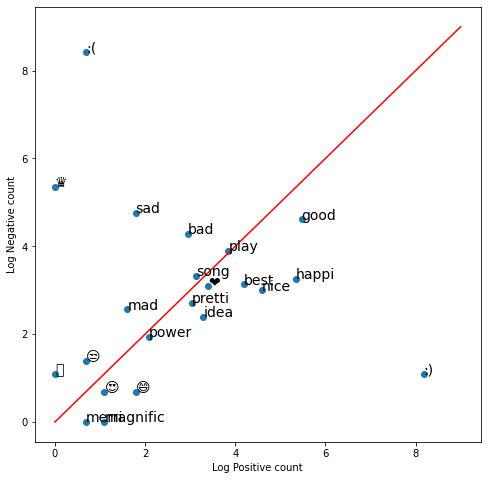

In [43]:
fig,ax = plt.subplots(figsize = (8,8))
#convert positive raw counts to logarithmic scale, we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])
#do the same for negative counts
y = np.log([x[2] + 1 for x in data])

#Plot a dot for each pair of words
ax.scatter(x,y)

#assign axis label
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

#Add the word as the label at the same position as we addeed the points just before

for i in range(0,len(data)):
    ax.annotate(data[i][0], (x[i],y[i]), fontsize = 14)
    
ax.plot([0,9],[0,9], color='red') #Plot the red line that divides the 2 areas
plt.show();

<h1> Visualizing Tweets and the Logistic Regression Model </h1>

In [47]:
tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)
#split data for testing and training
train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
print(f"Number of tweets: {len(train_x)}")

Number of tweets: 8000


In [48]:
#Load the extracted features
data = pd.read_csv('logistic_features.csv');
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [49]:
#Each feature is labeled as bias, positive and negative
X = data[['bias', 'positive', 'negative']].values # Get only the numerical values of the dataframe
Y = data['sentiment'].values; # Put in Y the corresponding labels or sentiments
print(X.shape)
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [50]:
#Load a pretrained regression model

theta = [7e-08, 0.0005239, -0.00055517]

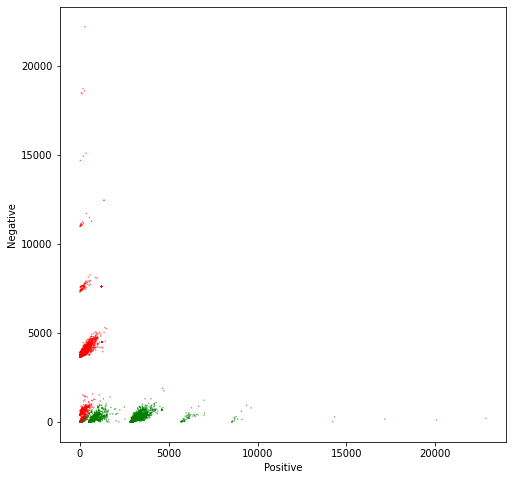

In [52]:
#Plot the samples in a scatter plot
fig, ax = plt.subplots(figsize= (8,8))
colors = ['red', 'green']
#Color based on sentiment
ax.scatter(X[:,1], X[:,2], c = [colors [int(k)] for k in Y ], s = 0.1) #Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative");

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model! 

## Plot the model alongside the data

We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where $$ z = \theta * x = 0.$$
To draw this line, we have to solve the above equation in terms of one of the independent variables.

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations(neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model. 

$$direction = pos * \theta_2 / \theta_1$$


In [53]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

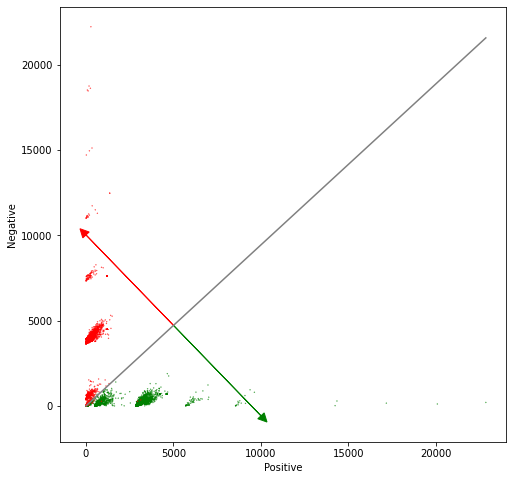

In [54]:
fig, ax = plt.subplots(figsize = (8,8))
colors = ['red', 'green']
#Color base on the sentiment Y 
ax.scatter(X[:,1], X[:,2], c = [colors[int(k)] for k in Y], s = 0.1) #Plot a dot for each pait of words
plt.xlabel("Positive")
plt.ylabel("Negative")

#Now lets represent the logistic regression model in this chart

maxpos = np.max(X[:,1])

offset = 5000

ax.plot([0,maxpos], [neg(theta,0), neg(theta,maxpos)], color = 'gray')
# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()